In [23]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load dataset

In [5]:
url = "https://storage.googleapis.com/qwasar-public/track-ds/iris.csv"

In [6]:
dataset = pd.read_csv(url)

# Summarizing the dataset

In [7]:
print(dataset.shape)

(150, 5)


In [8]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Visualization

### A - Univariate

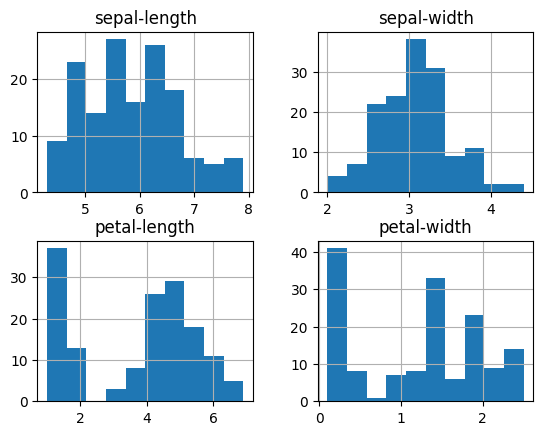

In [11]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

### B - Multivariate

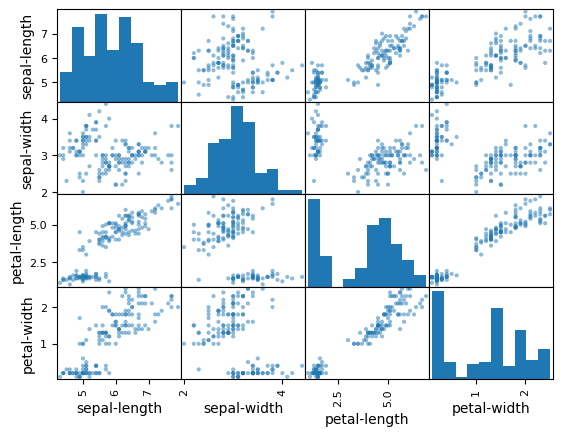

In [12]:
scatter_matrix(dataset)
pyplot.show()

## Building our code to evaluate some algorithms

In [13]:
encoder = LabelEncoder()
dataset['class'] = encoder.fit_transform(dataset['class'])

In [14]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
def fit_model(model):
    model.fit(X_train, Y_train)
    y_predict = model.predict(X_validation)
    print('Model name: ' + str(model))
    print(f'Accurance score: {int(accuracy_score(Y_validation, y_predict) * 100)}%')
    print(f'Mean Squared Error: {round(mean_squared_error(Y_validation, y_predict), 3) * 100}%')
    print(f'Cross validation: {int(np.mean(cross_val_score(model, X_train, Y_train, cv=10)) * 100)}%')
    print(f'Confusion Matrix: \n {confusion_matrix(Y_validation, y_predict)}')
    cm = confusion_matrix(Y_validation, y_predict, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    pyplot.show()

Model name: DecisionTreeClassifier()
Accurance score: 96%
Mean Squared Error: 3.3000000000000003%
Cross validation: 95%
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


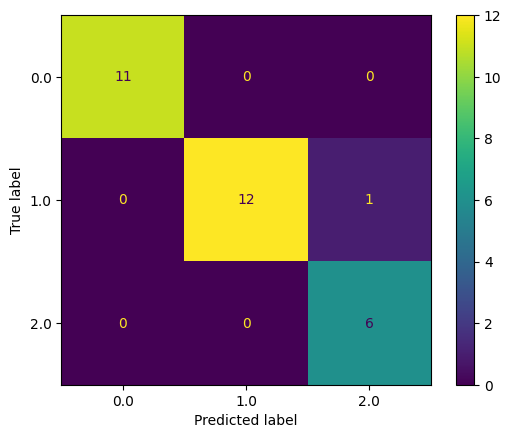

In [17]:
model = DecisionTreeClassifier()
fit_model(model)

Model name: GaussianNB()
Accurance score: 96%
Mean Squared Error: 3.3000000000000003%
Cross validation: 94%
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


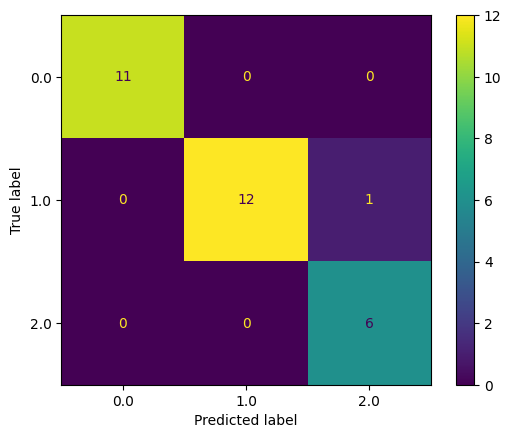

In [18]:
model = GaussianNB()
fit_model(model)

Model name: KNeighborsClassifier()
Accurance score: 100%
Mean Squared Error: 0.0%
Cross validation: 95%
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


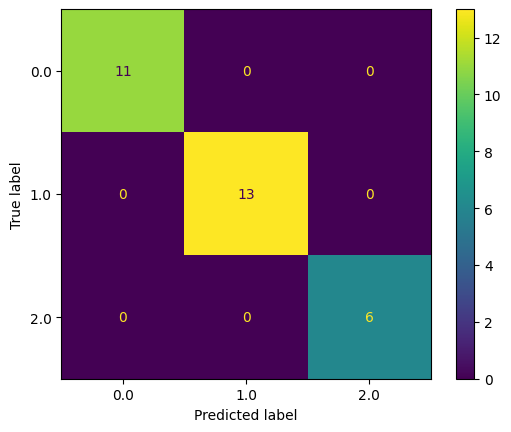

In [19]:
model = KNeighborsClassifier()
fit_model(model)

Model name: LogisticRegression(multi_class='ovr', solver='liblinear')
Accurance score: 83%
Mean Squared Error: 16.7%
Cross validation: 95%
Confusion Matrix: 
 [[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]


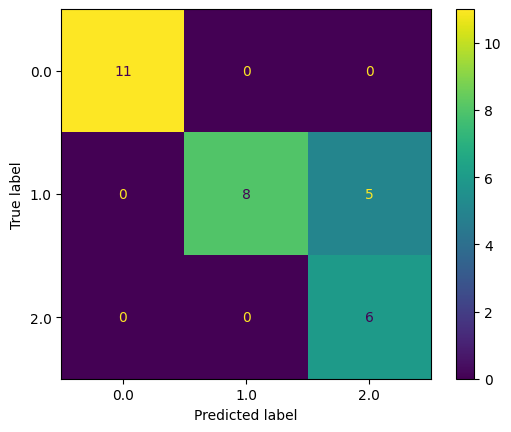

In [20]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
fit_model(model)

Model name: LinearDiscriminantAnalysis()
Accurance score: 100%
Mean Squared Error: 0.0%
Cross validation: 97%
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


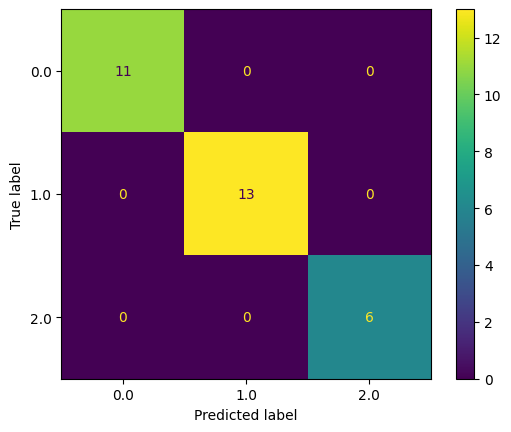

In [21]:
model = LinearDiscriminantAnalysis()
fit_model(model)

Model name: SVC(gamma='auto')
Accurance score: 96%
Mean Squared Error: 3.3000000000000003%
Cross validation: 98%
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


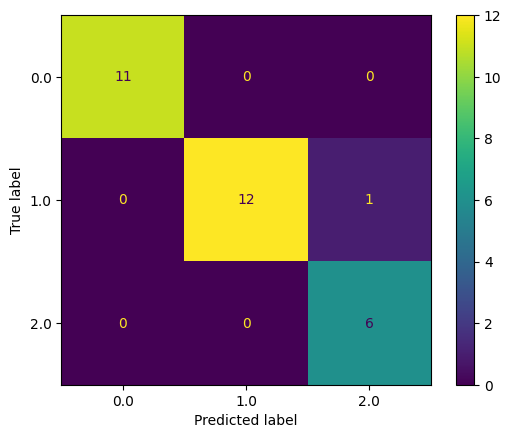

In [22]:
model = SVC(gamma='auto')
fit_model(model)